In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

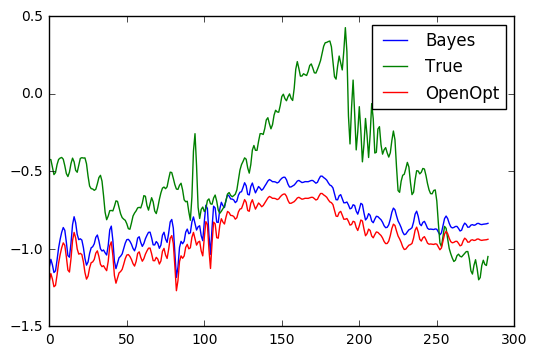

In [28]:
bayes_df = pd.read_csv('hx01_611.csv')
opt_df = pd.read_csv('BS_0_0.csv', header=None,names=['Vmca','CCO'])
opt_df.index = range(0,len(opt_df))
true_df = pd.read_csv('hx01.csv')
plt.plot(bayes_df['CCO'], label='Bayes')
plt.plot(true_df['CCO'], label='True')
plt.plot(opt_df['CCO'], label='OpenOpt')
plt.legend()

In [38]:
import numpy as np
# All functions here can expect to handle the output from BCMD Model i.e.
# a dict.


def euclidean_dist(data1, data2):
    """
    Gives the euclidean distance between two numpy arrays.

    :param data1: Numpy array for data1
    :type data1: np.ndarray
    :param data2: Numpy array for data2
    :type data2: np.ndarray

    :return: Euclidean distance measure
    :rtype: list of float
    """
    try:
        assert(data1.shape == data2.shape), 'Arrays not of equal size'
    except AssertionError as e:
        print(e)
        print("\tData 1: ", data1.shape)
        print("\tData 2: ", data2.shape)

    return np.sum(np.sqrt(np.sum((data1 - data2) * (data1 - data2), axis=1)))

def zero_array(array):
    """
    Method to zero an array of data with the initial values.
    :param array: Array of data - rows are time points, columns are signals.
    :return: Zero'd numpy array
    :rtype: np.ndarray
    """
    init = array[:, 0]
    zerod = np.apply_along_axis(lambda x: x - init, 0, array)
    return zerod

def get_distance(actual_data, sim_data, targets,
                 distance=euclidean_dist, zero=False):

    d0 = []
    d_star = []
    for idx, k in enumerate(targets):
        d0.append(actual_data[k])
        d_star.append(sim_data[k])
    if zero:
        try:
            d_star = zero_array(np.array(d_star))
            plt.plot(d_star)
        except (TypeError, IndexError):
            print('Invalid Data', end="\r")
            return (float('NaN'))

    return distance(np.array(d0), np.array(d_star))

960.66385996165536

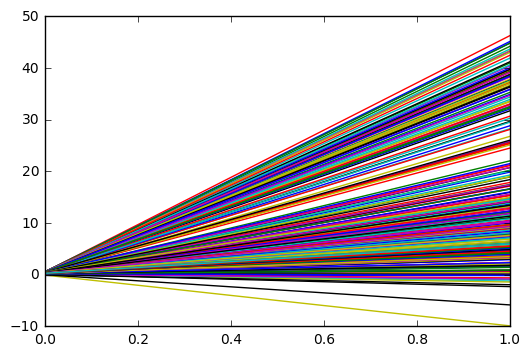

In [39]:
get_distance(true_df, bayes_df, ['CCO', 'Vmca'], zero=True)